In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

sns.set_palette('Dark2')
sns.set_style('darkgrid')

In [2]:
dados = pd.read_csv('prouni/cursos-prouni.csv')
dados.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


In [3]:
dados.describe()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,campus_id,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,41447.000000,32520.000000,25404.000000,8828.000000,13041.000000,4.144700e+04,4.144700e+04,32520.000000,16802.000000,16350.000000,5519.000000
mean,622.636966,1.535394,2.513541,1.873018,8.632544,4.207360e+13,6.786530e+05,575.982999,564.470439,527.517136,511.799638
std,606.442296,2.191578,3.019549,2.336403,18.372991,6.061552e+13,6.398410e+05,57.827594,57.869145,60.202170,56.787140
min,139.000000,0.000000,1.000000,1.000000,1.000000,2.248801e+07,2.240000e+02,450.000000,450.000000,450.000000,450.000000
25%,278.000000,0.000000,1.000000,1.000000,1.000000,6.460131e+11,1.172300e+04,544.360000,532.865000,453.980000,450.000000
50%,393.350000,1.000000,1.000000,1.000000,2.000000,2.003572e+12,6.587550e+05,580.740000,571.450000,532.420000,511.820000
75%,825.000000,2.000000,3.000000,2.000000,6.000000,1.036636e+14,1.058794e+06,614.145000,603.315000,573.235000,557.170000
max,9999.990000,58.000000,67.000000,74.000000,350.000000,2.008632e+14,2.008633e+06,781.200000,792.240000,776.360000,768.340000


In [4]:
print('Dados nulos:')
dados.isnull().sum()

Dados nulos:


grau                        0
turno                       0
mensalidade                 0
bolsa_integral_cotas     8927
bolsa_integral_ampla    16043
bolsa_parcial_cotas     32619
bolsa_parcial_ampla     28406
curso_id                    0
curso_busca                 0
cidade_busca                0
uf_busca                    0
cidade_filtro               0
universidade_nome           0
campus_nome                 0
campus_id                   0
nome                        0
nota_integral_ampla      8927
nota_integral_cotas     24645
nota_parcial_ampla      25097
nota_parcial_cotas      35928
dtype: int64

In [5]:
# dados.fillna(0, inplace=True)

In [6]:
#print('Dados nulos:')
#dados.isnull().sum()

## Distribuição entre turnos pelo ProUni

In [7]:
dados.turno.unique()

array(['Integral', 'Noturno', 'Matutino', 'Vespertino',
       'Curso a Distância'], dtype=object)

In [8]:
dados.turno.value_counts()

Curso a Distância    22926
Noturno              12196
Matutino              5175
Integral               640
Vespertino             510
Name: turno, dtype: int64

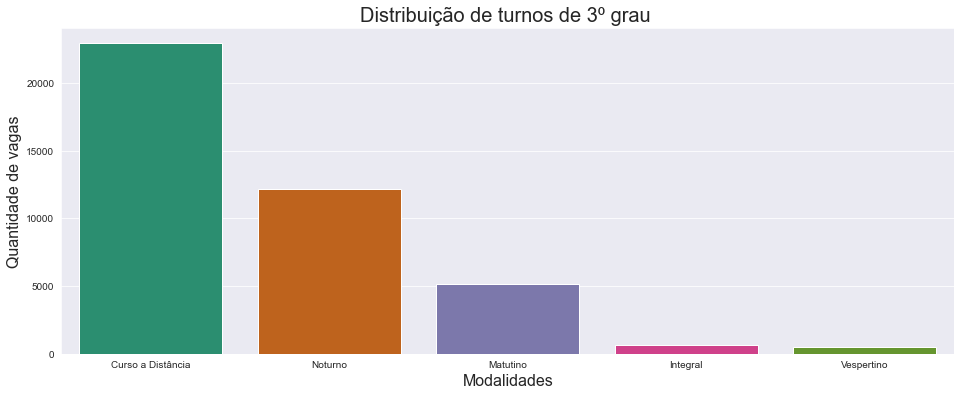

In [9]:
ax = sns.barplot(x=dados.turno.value_counts().index,y=dados.turno.value_counts())
ax.set_title('Distribuição de turnos de 3º grau ', fontsize=20)
ax.set_xlabel('Modalidades',fontsize=16)
ax.set_ylabel('Quantidade de vagas',fontsize=16)
ax.figure.set_size_inches(16,6)

## Distribuição entre modalidades pelo ProUni

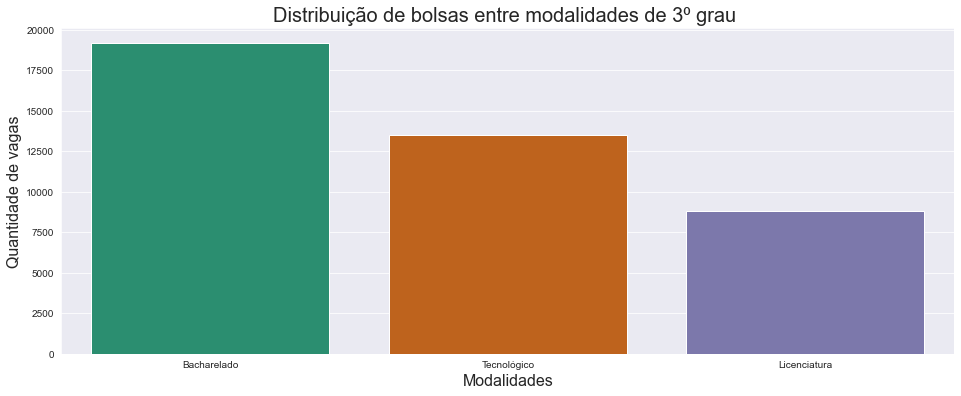

In [10]:
ax = sns.barplot(x=dados.grau.value_counts().index,y=dados.grau.value_counts())
ax.set_title('Distribuição de bolsas entre modalidades de 3º grau ', fontsize=20)
ax.set_xlabel('Modalidades',fontsize=16)
ax.set_ylabel('Quantidade de vagas',fontsize=16)
ax.figure.set_size_inches(16,6)

In [11]:
dados.grau.value_counts()

Bacharelado     19165
Tecnológico     13480
Licenciatura     8802
Name: grau, dtype: int64

## Distribuições dos bolsas pelo ProUni

In [12]:
dados.nome.value_counts()

Administração                     2754
Pedagogia                         2555
Ciências Contábeis                2056
Gestão de Recursos Humanos        1595
Educação Física                   1528
                                  ... 
Engenharia Mecânica Automotiva       1
Educação Artística - Música          1
Estatística                          1
Processos Escolares                  1
Administração de Empresas            1
Name: nome, Length: 296, dtype: int64

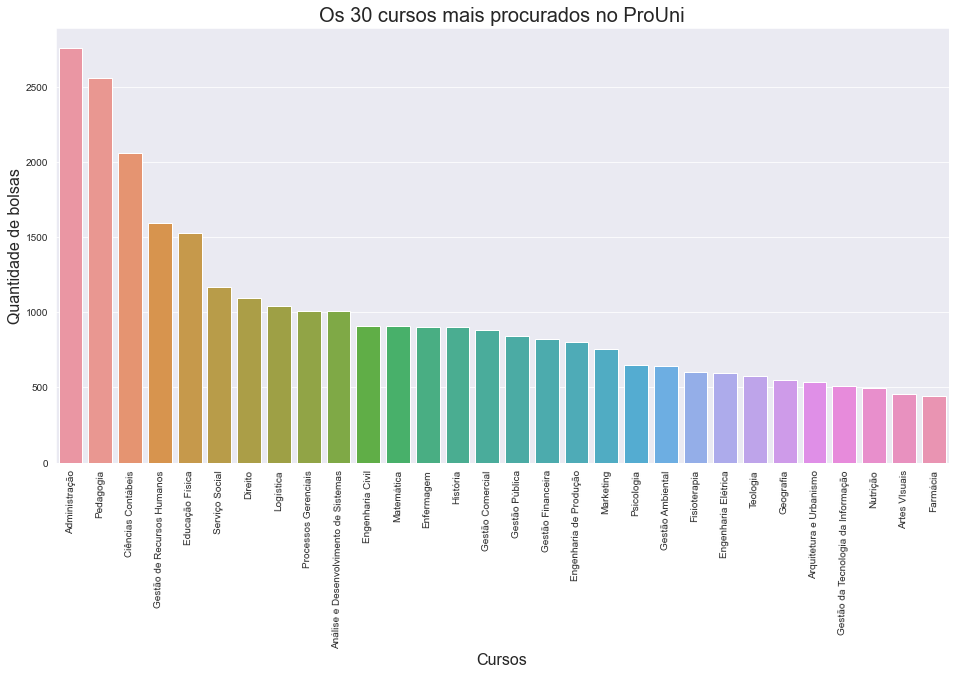

In [13]:
ax = sns.barplot(x=dados.nome.value_counts().index[:30],y=dados.nome.value_counts()[:30])
ax.set_title('Os 30 cursos mais procurados no ProUni', fontsize=20)
ax.set_xlabel('Cursos',fontsize=16)
ax.set_ylabel('Quantidade de bolsas',fontsize=16)
plt.xticks(rotation=89)
ax.figure.set_size_inches(16,8)

## Distribuição das notas mais aceitas pelo ProUni em ampla concorrencia

In [14]:
dados.nota_integral_ampla.min()

450.0

In [15]:
dados.nota_integral_ampla.max()

781.2

In [16]:
dados.nota_integral_ampla.value_counts()

450.00    2112
583.00      15
604.20      14
600.74      13
610.80      13
          ... 
503.24       1
462.48       1
489.84       1
745.42       1
707.84       1
Name: nota_integral_ampla, Length: 9753, dtype: int64

In [17]:
dados.nota_integral_ampla.value_counts().shape

(9753,)

In [18]:
value = dados.nota_integral_ampla.value_counts().values
value[:30]

array([2112,   15,   14,   13,   13,   12,   12,   12,   12,   12,   12,
         12,   12,   12,   11,   11,   11,   11,   11,   11,   11,   11,
         11,   11,   11,   11,   11,   11,   11,   11], dtype=int64)

In [19]:
index = dados.nota_integral_ampla.value_counts().index
index[:30]

Float64Index([ 450.0,  583.0,  604.2, 600.74,  610.8, 582.86, 576.48, 567.18,
              600.08, 617.32, 577.24,  578.9,  579.2, 584.62, 597.64,  593.5,
              639.18, 595.48, 608.68,  602.3, 614.44, 585.52, 609.02, 573.36,
              563.86, 588.46, 571.42, 557.66, 567.26, 592.56],
             dtype='float64')

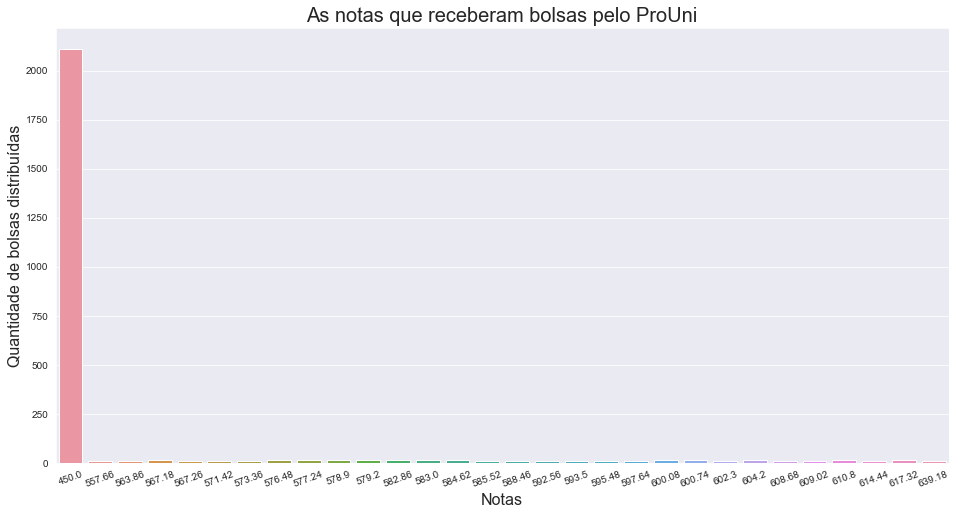

In [20]:
ax = sns.barplot(y=value[:30],x=index[:30])
ax.set_title('As notas que receberam bolsas pelo ProUni', fontsize=20)
ax.set_xlabel('Notas',fontsize=16)
ax.set_ylabel('Quantidade de bolsas distribuídas',fontsize=16)
plt.xticks(rotation=20)
ax.figure.set_size_inches(16,8)

In [21]:
classes = [dados.nota_integral_ampla.min(),500,550,600,650,dados.nota_integral_ampla.max()]

In [22]:
labels = [ 'Até 500','Até 550','Até 600','Até 650','Acima 700']

In [23]:
contagem = pd.value_counts(
                pd.cut(x = dados.nota_integral_ampla,
                bins = classes,
                labels = labels,
                include_lowest = True)
           )
contagem

Até 600      11973
Até 650       8773
Até 550       5671
Até 500       3495
Acima 700     2608
Name: nota_integral_ampla, dtype: int64

In [24]:
porcentagem = pd.value_counts(
                pd.cut(x = dados.nota_integral_ampla,
                          bins = classes,
                          labels = labels,
                          include_lowest = True),
              normalize = True) * 100

In [25]:
tabela_rendas = pd.DataFrame( {'Porcentagem (%)': porcentagem, 'Frequência': contagem})
tabela_rendas

,Porcentagem (%),Frequência
Até 600,36.817343,11973
Até 650,26.977245,8773
Até 550,17.438499,5671
Até 500,10.747232,3495
Acima 700,8.019680,2608


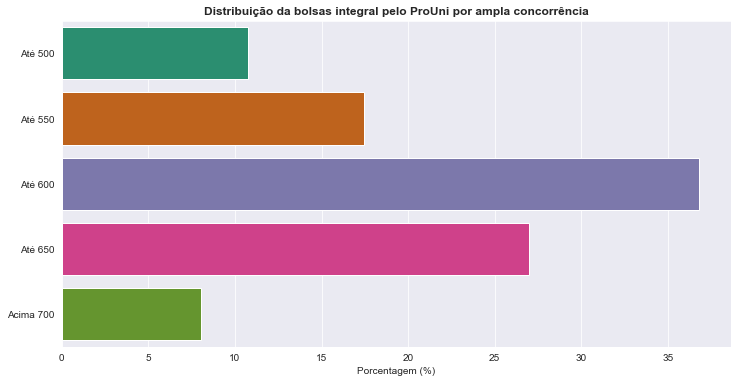

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(data= tabela_rendas, x= tabela_rendas['Porcentagem (%)'],
            y=tabela_rendas.index,
            orient='h')
plt.title('Distribuição da bolsas integral pelo ProUni por ampla concorrência',fontweight= 'bold')
plt.show()

## Análise das mensalidade das faculdades

In [27]:
dados.mensalidade.unique()

array([9999.99, 9836.4 , 9715.61, ...,  149.  ,  144.  ,  139.  ])

In [28]:
dados.mensalidade.value_counts()

299.00     1270
278.00     1230
325.00     1213
237.00      969
270.00      927
           ... 
411.34        1
1123.60       1
1178.19       1
1053.58       1
506.67        1
Name: mensalidade, Length: 7114, dtype: int64

In [29]:
value = dados.mensalidade.value_counts().values
value[:30]

array([1270, 1230, 1213,  969,  927,  829,  772,  677,  672,  611,  548,
        520,  518,  506,  430,  420,  420,  383,  364,  318,  317,  299,
        279,  271,  254,  243,  230,  219,  218,  214], dtype=int64)

In [30]:
index = dados.mensalidade.value_counts().index
index[:30]

Float64Index([ 299.0,  278.0,  325.0,  237.0,  270.0,  333.0,  279.0, 257.19,
               309.0,  298.0,  289.0,  209.0,  239.0,  274.0,  308.0,  269.0,
               249.0,  250.0, 393.35,  189.0,  259.0,  293.0,  230.0,  149.0,
               319.0,  229.0,  248.0,  265.0,  288.0, 402.65],
             dtype='float64')

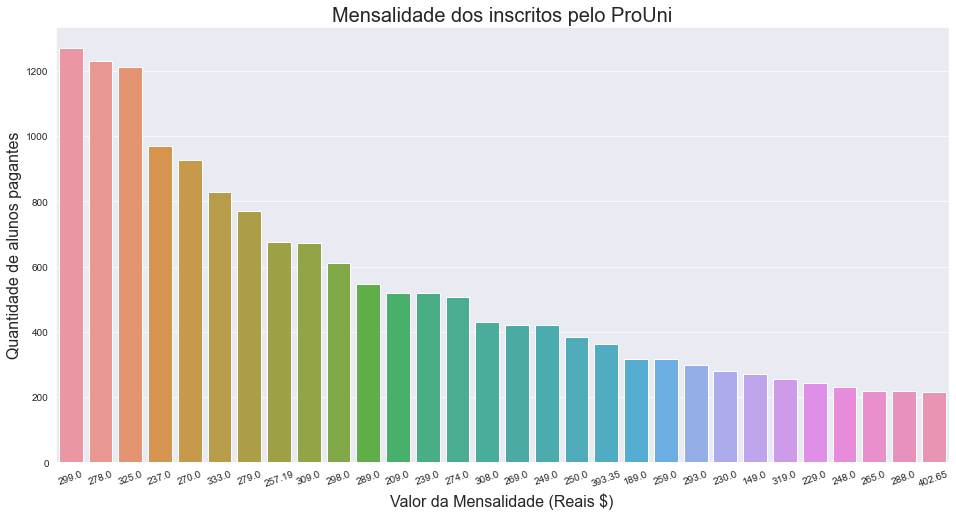

In [31]:
ax = sns.barplot(x=index[:30],y=value[:30],
                 order=index[:30]
                )
ax.set_title('Mensalidade dos inscritos pelo ProUni', fontsize=20)
ax.set_xlabel('Valor da Mensalidade (Reais $)',fontsize=16)
ax.set_ylabel('Quantidade de alunos pagantes',fontsize=16)
plt.xticks(rotation=20)
ax.figure.set_size_inches(16,8)

In [32]:
dados

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,Licenciatura,Curso a Distância,149.00,1.0,NaN,NaN,NaN,994312865605,Sociologia,Paraiso do Tocantins,TO,MTcwMTAwNDE2MTA5,Universidade Paulista - UNIP,PARAISO DO TOCANTINS - Centro,9943,Sociologia,502.36,NaN,NaN,NaN
41443,Tecnológico,Curso a Distância,144.00,1.0,2.0,2.0,5.0,65868712869275,Marketing,Sao VIcente,SP,MzUxNTA2MzUxMDA5,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,658687,Marketing,533.34,450.00,450.00,450.00
41444,Tecnológico,Vespertino,139.00,1.0,NaN,NaN,NaN,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,NTMwMTAwMTAwMTA4,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,NaN,NaN,NaN
41445,Bacharelado,Curso a Distância,139.00,1.0,NaN,NaN,NaN,96781210935,Serviço Social,Vitoria,ES,MzIwMzAwOTA1MzA5,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,NaN,NaN,NaN


In [33]:
dados.universidade_nome.value_counts().index[:30]

Index(['Centro Universitário Internacional - Uninter - UNINTER',
       'Universidade Paulista - UNIP', 'Universidade Pitágoras Unopar',
       'Faculdade Educacional da Lapa - FAEL',
       'Centro Universitário de Maringá - Unicesumar - Unicesumar - UNICESUMAR',
       'Universidade Anhanguera - UNIDERP',
       'Universidade Cidade de São Paulo - UNICID',
       'Centro Universitário Cenecista de Osório - Unicnec - UNICNEC',
       'Centro Universitário Leonardo da VInci - UNIASSELVI',
       'Centro Universitário Estácio de Ribeirão Preto - Estácio Ribeirão Pre - ESTÁCIO RIBEIRÃO PRE',
       'Centro Universitário Claretiano - Ceuclar - CEUCLAR',
       'Universidade Nove de Julho - UNINOVE',
       'Universidade de Franca - UNIFRAN',
       'Universidade Cruzeiro do Sul - UNICSUL',
       'Centro Universitário de Jaguariúna - Faj - FAJ',
       'Centro Universitário da Grande Dourados - Unigran - UNIGRAN',
       'Universidade de Uberaba - UNIUBE', 'Universidade Tiradentes - UNIT'

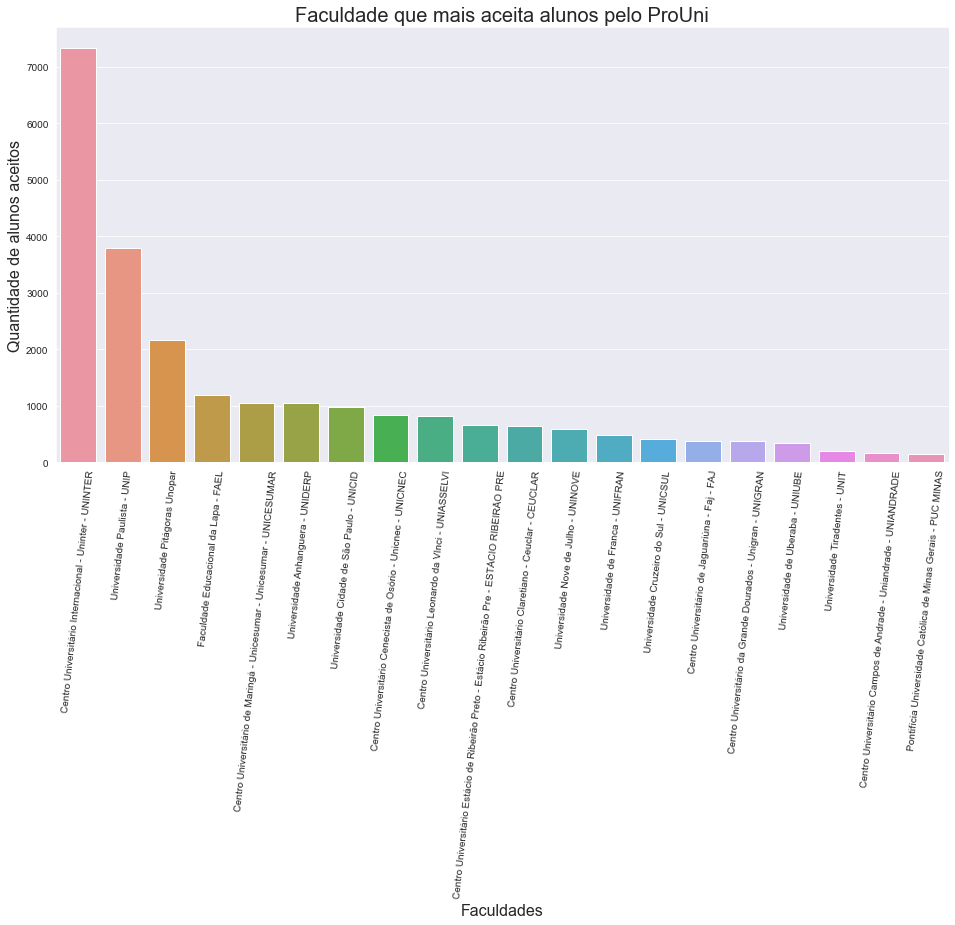

In [34]:
ax = sns.barplot(y=dados.universidade_nome.value_counts().values[:20],
                   x=dados.universidade_nome.value_counts().index[:20])
ax.set_title('Faculdade que mais aceita alunos pelo ProUni', fontsize=20)
ax.set_xlabel('Faculdades',fontsize=16)
ax.set_ylabel('Quantidade de alunos aceitos',fontsize=16)
plt.xticks(rotation=84)
ax.figure.set_size_inches(16,8)

## Análise da distribuição de bolsas de medicina em RJ e SP

Será analisado a distribuição de mensalidade, turno  e quais universidades aceitam os alunos de medicina.

In [44]:
dados.uf_busca.unique()

array(['MS', 'CE', 'SP', 'AC', 'MG', 'MT', 'BA', 'RJ', 'PA', 'PR', 'PI',
       'PB', 'RS', 'MA', 'TO', 'AL', 'PE', 'SC', 'RO', 'DF', 'RN', 'SE',
       'GO', 'ES', 'AP', 'AM', 'RR'], dtype=object)

In [67]:
rj = dados.query("curso_busca == 'Medicina' and uf_busca=='RJ' ")
print('A Quantidade de alunos que receberam bolsas no RJ em medicina é: ',rj.shape[0])
rj.head()

A Quantidade de alunos que receberam bolsas no RJ em medicina é:  5


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
10,Bacharelado,Integral,9023.07,4.0,4.0,5.0,5.0,65921511844324,Medicina,Itaperuna,RJ,MzMwMTAwMTAyMjA1,Faculdade Redentor - FACREDENTOR,CAMPUS - ITAPERUNA - PRESIDENTE COSTA E SILVA...,659215,Medicina,741.06,729.02,730.98,722.82
47,Bacharelado,Integral,7674.53,6.0,5.0,NaN,NaN,65792598054,Medicina,Teresopolis,RJ,MzMwNjAxNTA1ODAy,Centro Universitário Serra dos Órgãos - UNIFESO,CAMPUS ANTÔNIO PAULO CAPANEMA DE SOUZA - Alto,657925,Medicina,744.50,733.10,NaN,NaN
83,Bacharelado,Integral,6990.00,5.0,4.0,NaN,NaN,2819845034,Medicina,Vassouras,RJ,MzMwNjAxNDA2MjA2,Universidade Severino Sombra - USS,UNIVERSIDADE SEVERINO SOMBRA - CENTRO,28198,Medicina,761.96,739.84,NaN,NaN
85,Bacharelado,Integral,6950.00,3.0,3.0,NaN,NaN,65792497724,Medicina,Petropolis,RJ,MzMwNjAxNTAzOTA2,Faculdade de Medicina de Petrópolis - FMP,CAMPUS BARÃO DO RIO BRANCO - PETRÓPOLIS/RJ - C...,657924,Medicina,753.70,751.30,NaN,NaN
116,Bacharelado,Integral,6135.33,11.0,10.0,NaN,NaN,54499964,Medicina,Valenca,RJ,MzMwNTAxMjA2MTA3,Centro de Ensino Superior de Valença - Cesva -...,UNIDADE DOM JOSÉ COSTA CAMPOS - Centro,544,Medicina,742.26,730.22,NaN,NaN


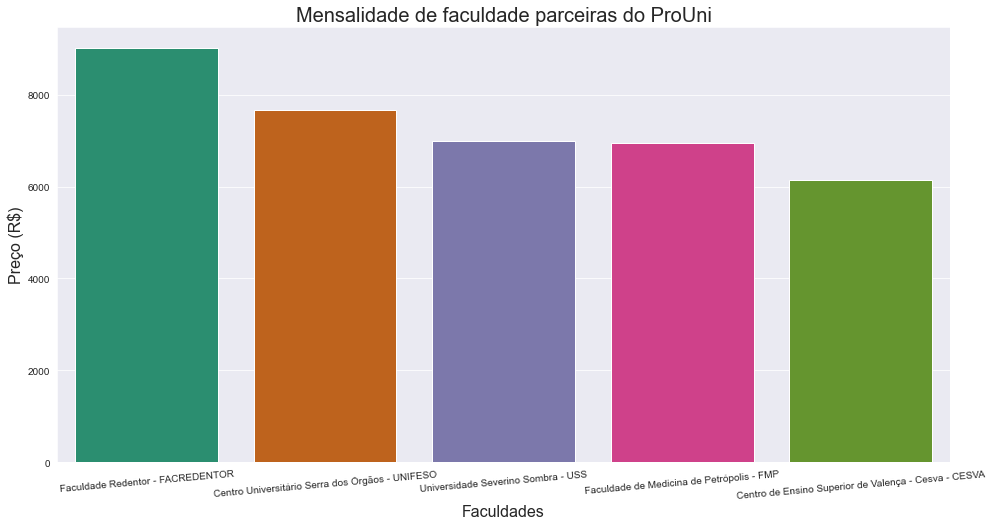

In [82]:
ax = sns.barplot(x=rj.universidade_nome,y=rj.mensalidade)
ax.set_title('Mensalidade de faculdade parceiras do ProUni', fontsize=20)
ax.set_xlabel('Faculdades',fontsize=16)
ax.set_ylabel('Preço (R$)',fontsize=16)
plt.xticks(rotation=5)
ax.figure.set_size_inches(16,8)

In [71]:
sp = dados.query("curso_busca == 'Medicina' and uf_busca=='SP' ")
print('A Quantidade de alunos que receberam bolsas no RJ em medicina é: ',sp.shape[0])
sp.head()

A Quantidade de alunos que receberam bolsas no RJ em medicina é:  22


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
5,Bacharelado,Integral,9650.00,8.0,15.0,NaN,NaN,65781564964,Medicina,Presidente Prudente,SP,MzUwODAzNjQxNDA2,Universidade do Oeste Paulista - UNOESTE,CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDE...,657815,Medicina,738.92,728.86,NaN,NaN
6,Bacharelado,Integral,9564.00,3.0,5.0,NaN,NaN,65788486984,Medicina,Marilia,SP,MzUwOTAzODI5MDA1,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,657884,Medicina,744.16,735.00,NaN,NaN
12,Bacharelado,Integral,8600.00,2.0,9.0,NaN,NaN,65881713994834,Medicina,Rio Claro,SP,MzUwNjAyNjQzOTA3,Claretiano - Faculdade - Claretianorc - CLARET...,CLARETIANO - FACULDADE - Cidade Claret,658817,Medicina,734.44,720.86,NaN,NaN
22,Bacharelado,Integral,8200.00,2.0,3.0,4.0,7.0,105596711902804,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Faculdade das Américas - FAM,RUA AUGUSTA - Consolação,1055967,Medicina,735.84,724.70,738.42,723.28


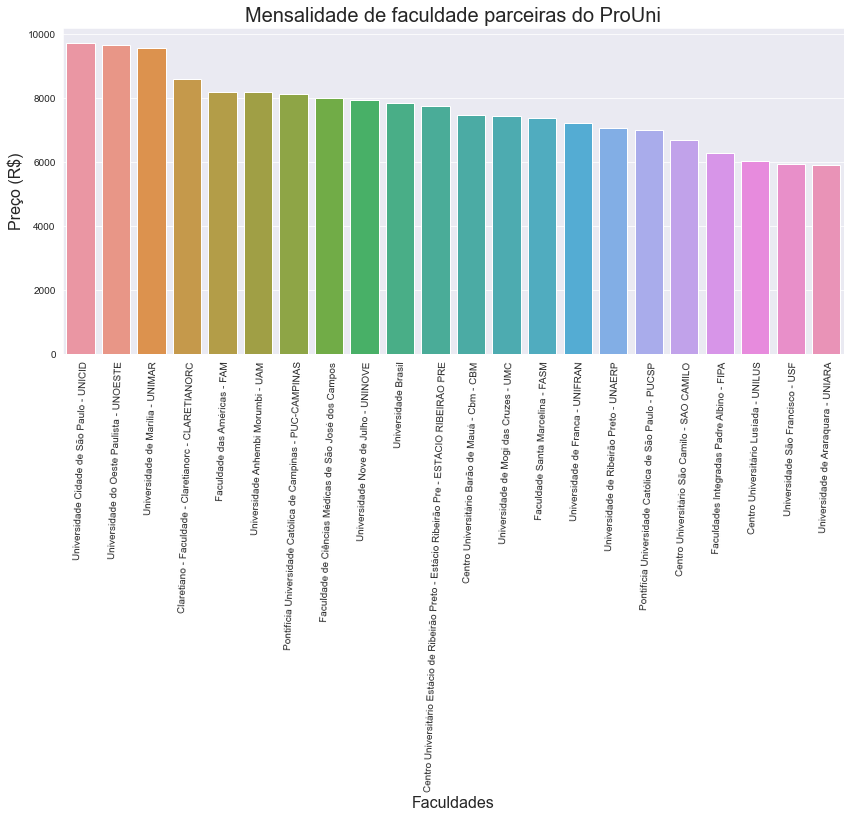

In [99]:
ax = sns.barplot(x=sp.universidade_nome,y=sp.mensalidade)
ax.set_title('Mensalidade de faculdade parceiras do ProUni', fontsize=20)
ax.set_xlabel('Faculdades',fontsize=16)
ax.set_ylabel('Preço (R$)',fontsize=16)
plt.xticks(rotation=88)
ax.figure.set_size_inches(14,6)